# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
#data.step.value_counts()

In [13]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

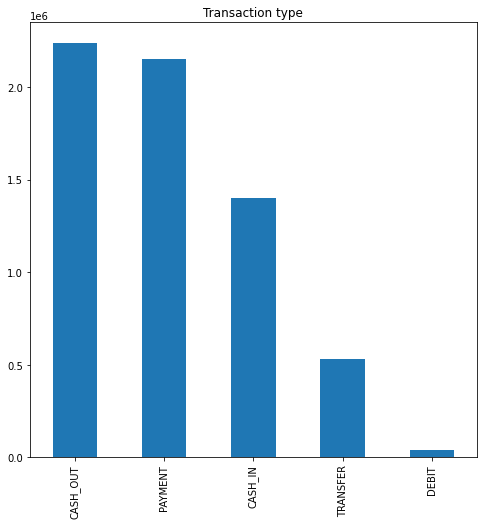

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

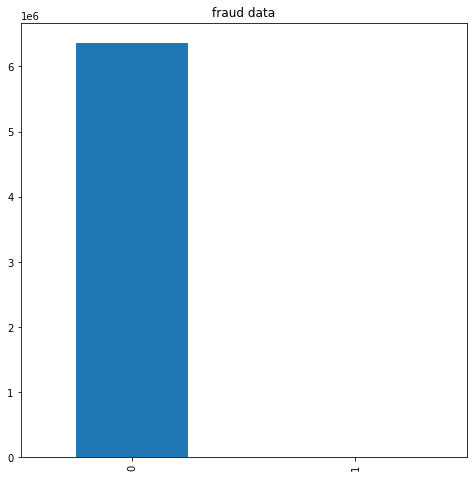

In [15]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [16]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\vitoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

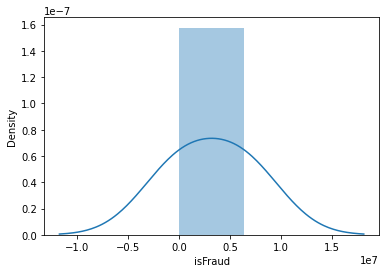

In [17]:
sns.distplot(data.isFraud.value_counts())


In [18]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

<AxesSubplot:xlabel='isFraud', ylabel='Count'>

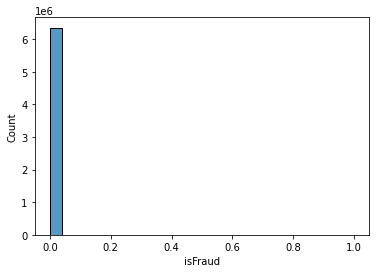

In [19]:
# Your response here
#the distribution is right skewed
sns.histplot(data.isFraud)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [20]:
# Your code here
# https://www.kaggle.com/datasets/ealaxi/paysim1
# Step is the number of hours since a certain point in time
# So we can use it for time

In [21]:
data.select_dtypes(include='object').nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [22]:
# Too many values in nameOrig and nameDest, let's drop them
data.drop(['nameOrig', 'nameDest'], axis = 1, inplace=True)

In [23]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = data_dummies.drop(['isFraud', 'isFlaggedFraud'], axis = 1)
y = data_dummies.isFraud

lr = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

Confusion matrix on TRAIN


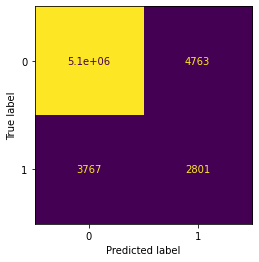

In [25]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train), colorbar=False)

Confusion matrix on TEST


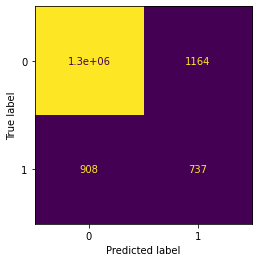

In [26]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test), colorbar=False)

### Now pick a model of your choice and evaluate its accuracy.

In [27]:
# Your code here
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TRAIN


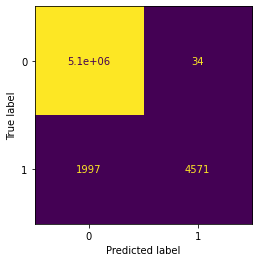

In [28]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, dtc.predict(X_train), colorbar=False)

Confusion matrix on TEST


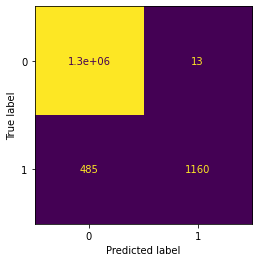

In [29]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

### Which model worked better and how do you know?

In [30]:
# Your response here
# The DecisionTreeClassifier works much better as it detects some fraud (almost half of it)

### Let's use NearMiss method for undersampling and compare the results with previous

In [31]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_res_nm, y_train_res_nm = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_nm))

Resampled dataset shape Counter({0: 6568, 1: 6568})


In [32]:
dtc.fit(X_train_res_nm, y_train_res_nm)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


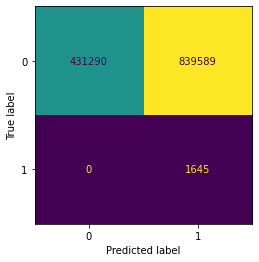

In [33]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

In [34]:
# Now almost all frauds are detected, but a lot of false positives.

### And now let's apply SMOTE

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_res_smote, y_train_res_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_smote))

Resampled dataset shape Counter({0: 5083528, 1: 5083528})


In [36]:
dtc.fit(X_train_res_smote, y_train_res_smote)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


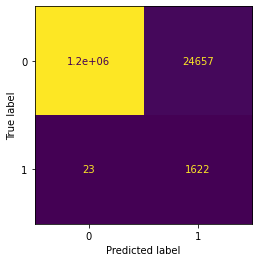

In [37]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

### Calculate classification report for imbalanced data to evaluate the models

In [38]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, dtc.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.99      0.99      0.98      0.97   1270879
          1       0.06      0.99      0.98      0.12      0.98      0.97      1645

avg / total       1.00      0.98      0.99      0.99      0.98      0.97   1272524



### What is your conclusion?

In [39]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, dtc.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.99      0.99      0.98      0.97   1270879
          1       0.06      0.99      0.98      0.12      0.98      0.97      1645

avg / total       1.00      0.98      0.99      0.99      0.98      0.97   1272524

